Курсовая работа  Цой А. на тему Real Estate Price Prediction

Состав курсовой работы:
1. Подготовка данных и оценка качества:
        * Анализ данных
        * Визуализация данных
        * Предобработка данных (обработка выбросов, пропусков)
        * Генерация новых признаков
        * Построение модели
2. Обучение модели
3. Проверка качества модели

In [12]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

In [15]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [127]:
import pickle   # сохранение модели

In [131]:
# 2. # 2. Разделение датасета
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [130]:
# 3. Модели
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [132]:
# 4. Метрики качества
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

# 5. Для визуализации внешних картинок в ноутбуке
from IPython.display import Image

In [16]:
DATASET_PATH = './train.csv'

In [145]:
PREPARED_DATASET_PATH = './train_prepared.csv'

In [17]:
matplotlib.rcParams.update({'font.size': 14})

Цель: предсказание стоимости дома

Описание датасета - статистические данные:
    DistrictId - ID регионаж;
    Rooms - количество комнат;
    Square - площадь квартиры;
    LifeSquare - жилая площадь;
    KitchenSquare - площадь кухни;
    Floor - этаж;
    HouseFloor - этажность дома;
    HouseYear - год постройки;
    Ecology_1 - уровень загрязнения в районе;
    Ecology_2 - класс 1 уровня загрязнения района;
    Ecology_3 - класс 2 уровня загрязнения района; 
    Social_1 - социальные обекты; 
    Social_2
    Social_3
    Healthcare_1 - расстояние до ближайшего медецинаского учреждения;
    Healthcare_2 - количество медецинских учреждений рядом;
    Shops_1 - количество магазинов рядом;
    Shops_2 - класс сервиса (удовлетворенность наличием магазинов) рядом с домом; 
    Price - цена за 1 кв м в рублях.

1. Подготовка данных и оценка качества

In [18]:
df = pd.read_csv(DATASET_PATH, sep=',') 
df.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962
5,5804,99,3.0,62.528465,47.103833,6.0,9,9.0,1972,0.012339,B,B,35,5776,1,2078.0,2,4,B,161044.944138
6,8864,44,1.0,33.938750,21.772930,9.0,1,12.0,1968,0.232205,B,B,24,4860,1,80.0,0,3,B,142402.739272
7,13072,59,2.0,50.391814,32.893256,8.0,8,17.0,1986,0.019509,B,B,37,7687,11,176.0,5,5,B,326174.175191
8,9951,1,1.0,46.887892,44.628132,1.0,12,20.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,160400.401732
9,8094,6,3.0,79.867477,75.085125,1.0,3,17.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,194756.023945


In [19]:
df.shape 

(10000, 20)

In [ ]:
# Датасет состоит из 20 признаков и 10000 вариантов этих признаков

In [20]:
df.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [21]:
df.index

RangeIndex(start=0, stop=10000, step=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [24]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [25]:
df = reduce_mem_usage(df)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [ ]:
# Уменьшили объем памяти на 68,1% для оптимизации хранения данных 

In [26]:
df.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
dtype: object

In [ ]:
# Зафиксировали изменение типов переменных 

In [27]:
df['Id'] = df['Id'].astype(str)
df['Id'].dtype

dtype('O')

Обзор количественных переменных

In [28]:
df_num_features = df.select_dtypes(include=['float32', 'int8', 'int16', 'int32'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,11,3097,0,NaN,0,0,305018.875000
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.546875
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.718750
3,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,1,264,0,NaN,0,1,168106.000000
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,33,8667,2,NaN,0,6,343995.093750


In [29]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,43.587592,0.839522,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,20.000000,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,75.000000,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


In [ ]:
# Можно уже зафиксировать выборомы показателей LifeSquare и KitchenSquare. Эти признаки не могут быть более признака Общая площадь Square 

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  object  
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [31]:
df['LifeSquare'].value_counts()

33.859653    2
35.999996    1
23.169222    1
46.338703    1
19.669596    1
            ..
45.673462    1
18.836775    1
67.347176    1
62.673653    1
37.604706    1
Name: LifeSquare, Length: 7886, dtype: int64

In [ ]:
# Оцениваем повторяемость признаков, при первом приближении видно,что показатель LifeSquare уникальный

In [32]:
df['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

Показатель Healthcare_1 может повторяться для нескольких записей. 

Обзор номинативных переменных

In [33]:
df_obj_features = df.select_dtypes(include=['category', 'object'])
df_obj_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,11809,B,B,B
1,3013,B,B,B
2,8215,B,B,B
3,2352,B,B,B
4,13866,B,B,B


In [34]:
df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [35]:
df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [36]:
df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

Обработка пропусков

In [37]:
df.isna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [38]:
df.isna().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [ ]:
# Выявлены пропуски у показателей LifeSquare - 2113 и Healthcare_1 - 4798

In [39]:
median = df['LifeSquare'].median()
df['LifeSquare'] = df['LifeSquare'].fillna(median)

In [40]:
medians = df[['Healthcare_1']].median()
medians

Healthcare_1    900.0
dtype: float32

In [41]:
df[['Healthcare_1']] = \
        df[['Healthcare_1']].fillna(medians)

In [42]:
df.isna().sum()

Id               0
DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [ ]:
# Заменили пропуски на медианный показатель по признаку. Проверка показала, что более пропусков нет 

In [69]:
df.isna()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_share,KitchenSquare_share
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


 Распределение целевой переменной

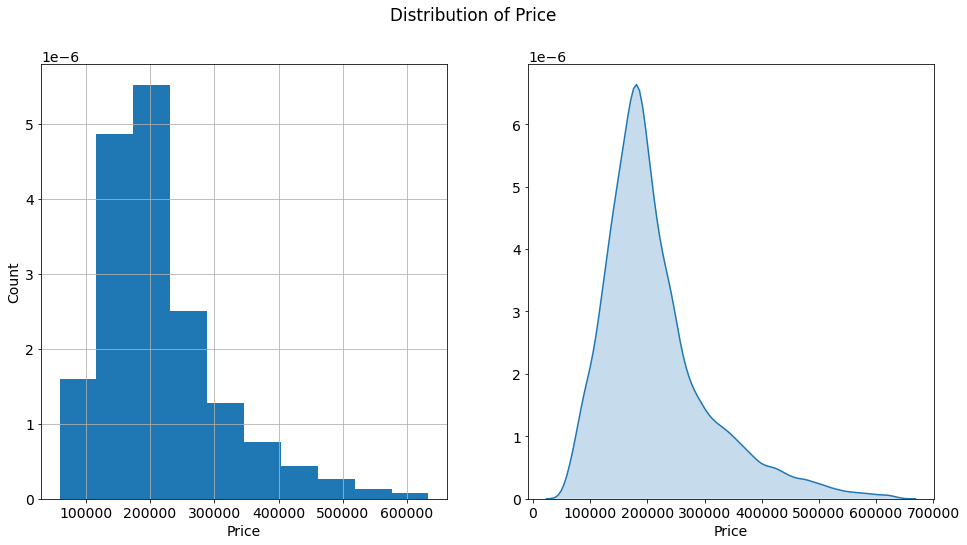

In [43]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=True)
plt.ylabel('Count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

In [44]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]
print(target_mean)
print(target_median)
print(target_mode)

214138.94
192269.65625
182938.08


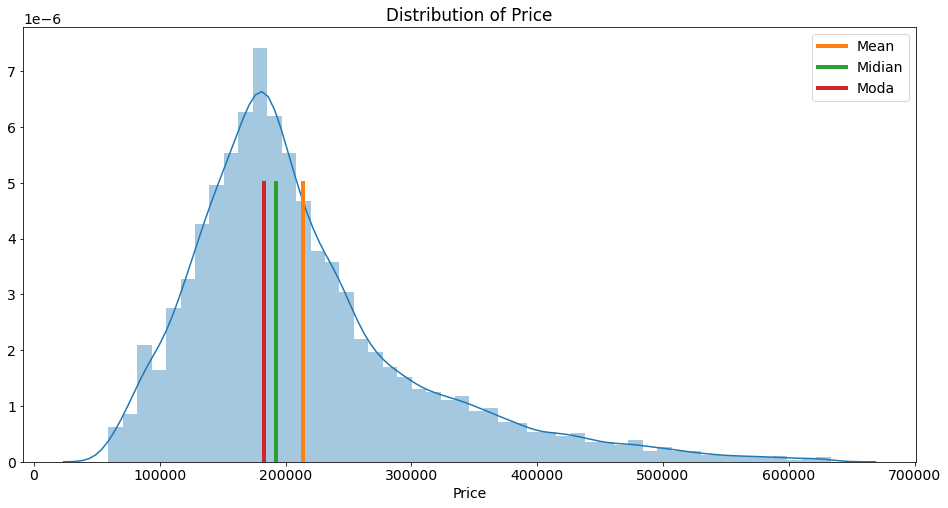

In [45]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.000005, 10)
plt.plot([target_mean] * 10, y, label='Mean',  linewidth=4)
plt.plot([target_median] * 10, y, label='Midian',  linewidth=4)
plt.plot([target_mode] * 10, y, label='Moda', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [46]:
df['Price']

0       305018.875000
1       177734.546875
2       282078.718750
3       168106.000000
4       343995.093750
            ...      
9995    119367.453125
9996    199715.156250
9997    165953.906250
9998    171842.406250
9999    177685.625000
Name: Price, Length: 10000, dtype: float32

In [47]:
target_bins = df['Price'] // 10000 * 10000
# 0 - 10000 --> 0
# 10001 - 20000 --> 1
# ...

target_adjusted_mode = target_bins.mode()[0]

target_adjusted_mode

180000.0

In [48]:
target_bins

0       300000.0
1       170000.0
2       280000.0
3       160000.0
4       340000.0
          ...   
9995    110000.0
9996    190000.0
9997    160000.0
9998    170000.0
9999    170000.0
Name: Price, Length: 10000, dtype: float32

In [49]:
target_bins.value_counts().iloc[:10]

180000.0    740
170000.0    673
160000.0    614
190000.0    596
150000.0    543
200000.0    517
140000.0    495
210000.0    469
130000.0    435
220000.0    373
Name: Price, dtype: int64

Анализ признаков и обработка выбросов

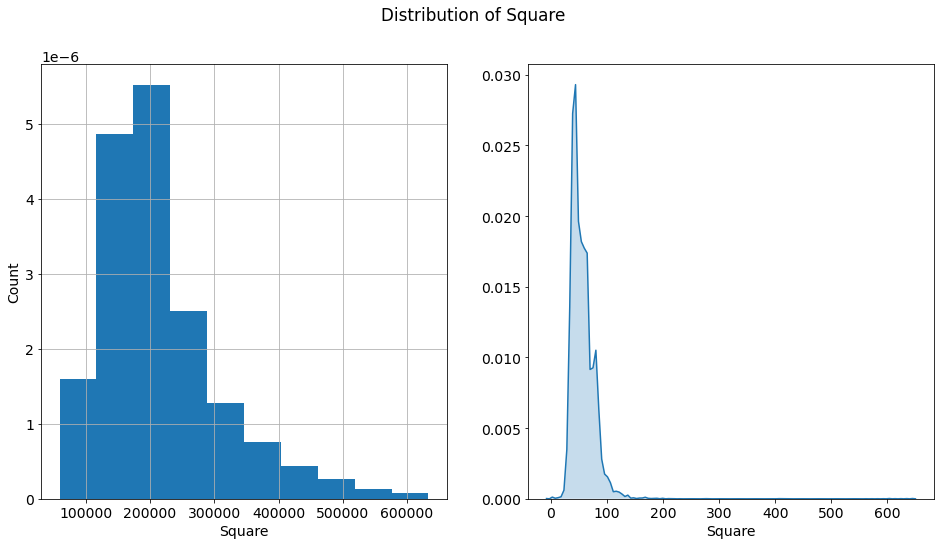

In [50]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(density=True)
plt.ylabel('Count')
plt.xlabel('Square')

plt.subplot(122)
sns.kdeplot(df['Square'], shade=True, legend=False)
plt.xlabel('Square')

plt.suptitle('Distribution of Square')
plt.show()

In [51]:
df_num_features = df.select_dtypes(include=['int16', 'float32', 'int32',  'int8'])
df_num_features.drop('Price', axis=1, inplace=True)

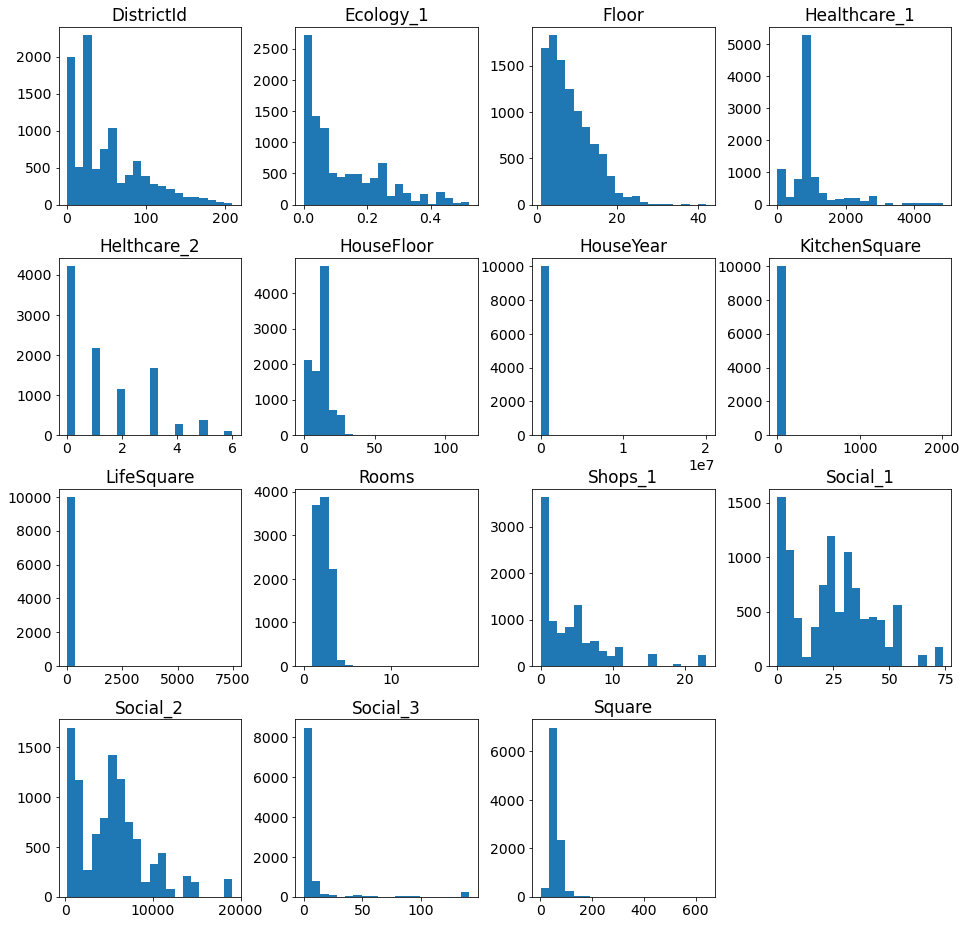

In [52]:
df_num_features.hist(figsize=(16,16), bins=20, grid=False);

In [53]:
df_num_features = df.select_dtypes(include=['float32', 'int8', 'int16', 'int32'])
df_num_features.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,27,3.0,115.027313,32.781261,10.0,4,10.0,2014,0.075424,11,3097,0,900.0,0,0,305018.875000
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177734.546875
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282078.718750
3,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,1,264,0,900.0,0,1,168106.000000
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,33,8667,2,900.0,0,6,343995.093750


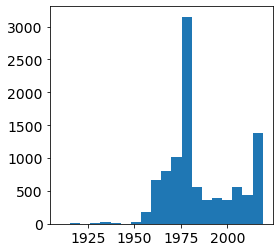

In [54]:
df_num_features.loc[df_num_features['HouseYear'] < 2020, 'HouseYear'].\
    hist(figsize=(4,4), bins=20, grid=False);

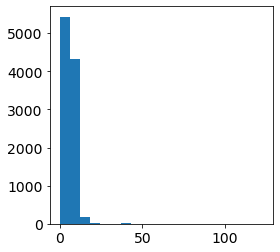

In [55]:
df_num_features.loc[df_num_features['KitchenSquare'] < 641, 'KitchenSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

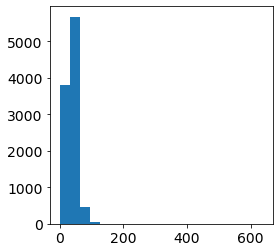

In [56]:
df_num_features.loc[df_num_features['LifeSquare'] < 641, 'LifeSquare'].\
    hist(figsize=(4,4), bins=20, grid=False);

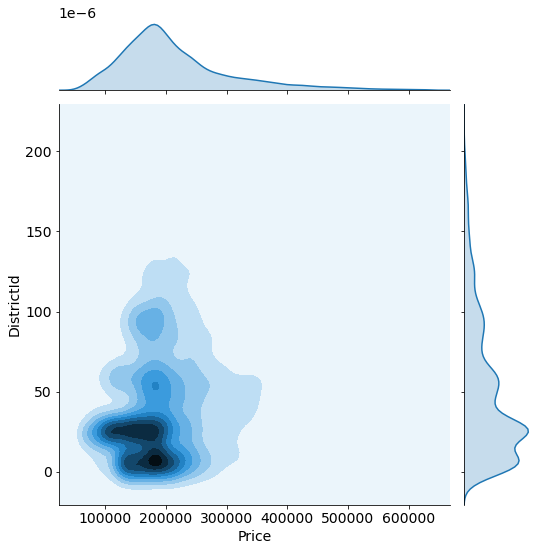

In [57]:
grid = sns.jointplot(df['Price'], df['DistrictId'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [99]:
df[df['DistrictId'] >= 92] # проверка на соответствие нумерации регионов согласно Конституции РФ, не соответствует, достаточно большое кол-во регионов выше 92

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_share,KitchenSquare_share,KitchenSquare_outlier,HouseFloor_veryhigh
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,...,2,900.0,0,6,B,343995.093750,59.986740,14.000141,0,0
5,5804,99,3.0,62.528465,47.103832,6.0,9,9.0,1972,0.012339,...,1,2078.0,2,4,B,161044.937500,75.331825,9.595630,0,0
12,898,93,1.0,47.564442,23.574423,13.0,9,24.0,2012,0.050900,...,1,30.0,2,3,B,199556.859375,49.563122,27.331341,0,0
15,4328,96,1.0,36.673409,16.285522,9.0,3,12.0,2003,0.041116,...,4,900.0,1,4,B,168143.343750,44.406898,24.540943,0,0
23,13427,103,1.0,38.174328,23.123014,9.0,6,12.0,1969,0.014423,...,4,900.0,0,3,B,194273.046875,60.572159,23.576054,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9961,7931,181,1.0,34.911270,18.433155,6.0,10,12.0,1955,0.000000,...,37,562.0,1,8,B,397528.750000,52.800011,17.186428,0,0
9967,15310,137,2.0,55.860950,34.465328,8.0,3,7.0,1961,0.049863,...,9,75.0,3,1,B,383774.718750,61.698429,14.321275,0,0
9985,277,93,1.0,34.723984,19.840549,9.0,6,16.0,1988,0.521867,...,0,900.0,0,0,B,149649.078125,57.137882,25.918686,0,0
9997,2795,178,1.0,29.648056,16.555363,5.0,3,5.0,1958,0.460556,...,14,900.0,1,5,B,165953.906250,55.839622,16.864511,0,0


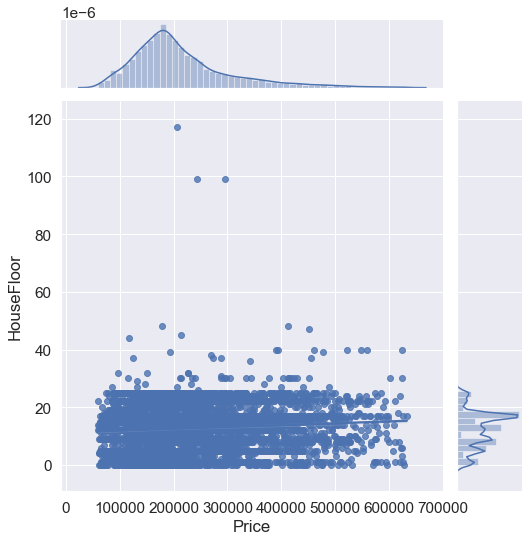

In [97]:
grid = sns.jointplot(df['Price'], df['HouseFloor'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [98]:
df['HouseFloor_veryhigh'] = (df['HouseFloor'] > 40) * 1 #показываем моделе, что этажность выше 40 - это выброс

In [ ]:
# наблюдается линейная зависимость от этажности дома, за исключением некоторых выбросов

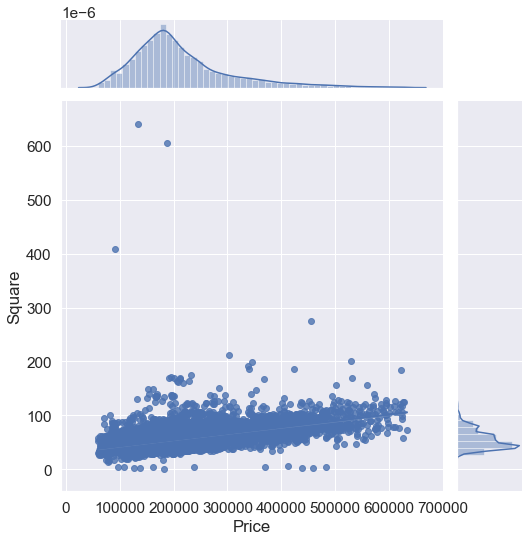

In [101]:
grid = sns.jointplot(df['Price'], df['Square'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [103]:
df['big_Square'] = (df['Square'] > 200) * 1  # пределяем площадь от 200 кв м, как выброс для формирования цены

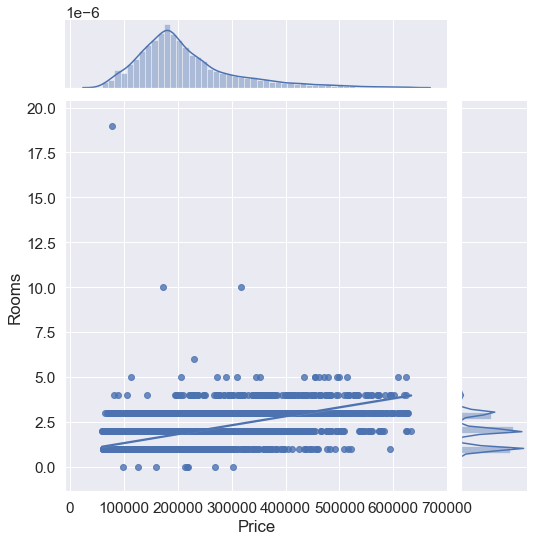

In [102]:
grid = sns.jointplot(df['Price'], df['Rooms'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [ ]:
# наблюдение за признаками Цены от Площади - отражает линейную зависимость, а количество комнат - нет

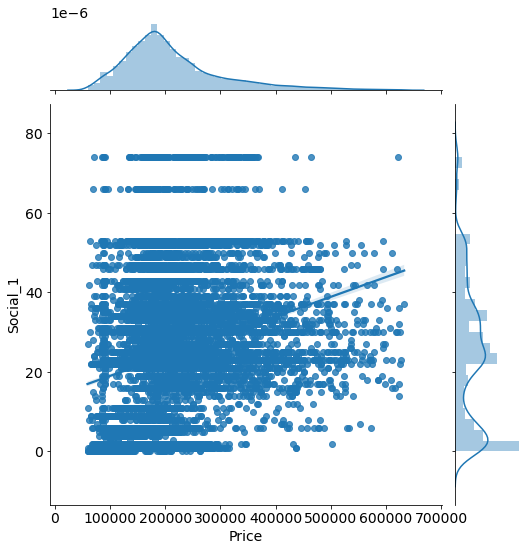

In [59]:
grid = sns.jointplot(df['Price'], df['Social_1'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

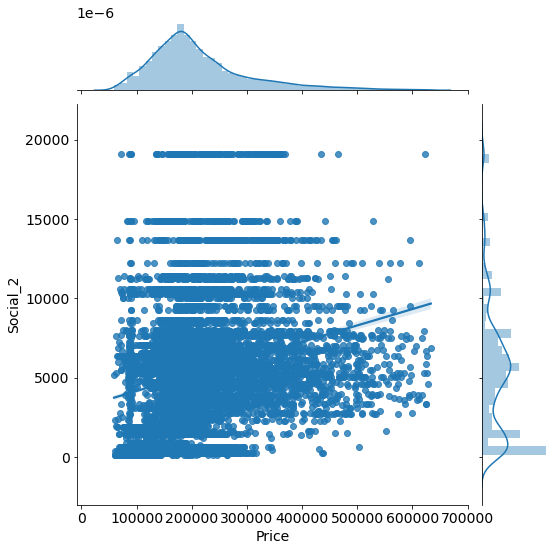

In [60]:
grid = sns.jointplot(df['Price'], df['Social_2'], kind='reg')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

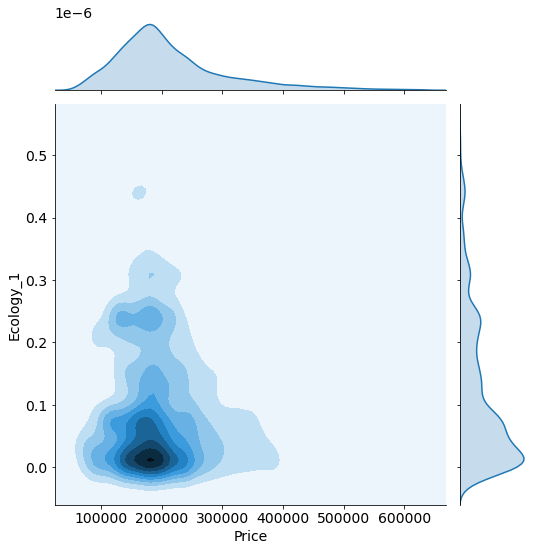

In [61]:
grid = sns.jointplot(df['Price'], df['Ecology_1'], kind='kde')
grid.fig.set_figwidth(8)
grid.fig.set_figheight(8)

plt.show()

In [ ]:
# Линейных зависимостей Цены от Района, класса социальности, экологичности районов не обнаружено

In [104]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,LifeSquare_share,KitchenSquare_share,KitchenSquare_outlier,HouseFloor_veryhigh,big_Square
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315720,36.266029,5.876100,8.526700,12.6094,3.990166e+03,0.118858,24.687000,...,8.039200,1026.358887,1.319500,4.231300,214138.937500,65.157974,12.329658,0.000200,0.000800,0.000600
std,43.587592,0.839522,21.058716,76.609962,5.174079,5.241148,6.7762,2.005003e+05,0.119025,17.532614,...,23.831875,746.644226,1.493601,4.806341,92872.273438,95.674278,74.937393,0.014141,0.028274,0.024489
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,59174.777344,0.600064,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774879,25.527400,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,...,0.000000,830.000000,0.000000,1.000000,153872.628906,53.721663,2.259053,0.000000,0.000000,0.000000
50%,36.000000,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,...,2.000000,900.000000,1.000000,3.000000,192269.648438,61.302967,12.068803,0.000000,0.000000,0.000000
75%,75.000000,2.000000,65.900627,41.427234,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,...,5.000000,990.000000,2.000000,6.000000,249135.460938,70.617514,16.512065,0.000000,0.000000,0.000000
max,209.000000,19.000000,641.065186,7480.592285,123.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,...,141.000000,4849.000000,6.000000,23.000000,633233.437500,9156.796875,6103.480469,1.000000,1.000000,1.000000


Обзор и построение новых Признаков 

In [76]:
# Создаем новые признаки Доля площади кухни и доля жилой площади
# Находим медиану доли площади кухни и жилой площади
# Находим записи, где доля кухни и жилой площади выше медианы (для площади Кухни) и 75% квантилля (для Общей площади)
# Делаем подмену выбросов, рассчитав признак, исходя из медианных значений и 75% квантилля  значения доли на общую площадь

In [70]:
# Доля Жилой площади в Общей площади
df['LifeSquare_share'] = df['LifeSquare'] / df['Square'] * 100

In [68]:
# Доля площади кухни в Общей площади
df['KitchenSquare_share'] = df['KitchenSquare'] / df['Square'] * 100

In [82]:
LifeSquare_share_median = df['LifeSquare_share'].median()
LifeSquare_share_median

61.3029670715332

In [79]:
KitchenSquare_share_median = df['KitchenSquare_share'].median()
KitchenSquare_share_median

12.068803787231445

In [81]:
df[df['KitchenSquare_share'] <= 12]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_share,KitchenSquare_share,KitchenSquare_outlier
0,11809,27,3.0,115.027313,32.781261,10.0,4,10.0,2014,0.075424,...,3097,0,900.0,0,0,B,305018.875000,28.498676,8.693587,0
3,2352,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,...,264,0,900.0,0,1,B,168106.000000,81.121841,2.474641,0
5,5804,99,3.0,62.528465,47.103832,6.0,9,9.0,1972,0.012339,...,5776,1,2078.0,2,4,B,161044.937500,75.331825,9.595630,0
8,9951,1,1.0,46.887894,44.628132,1.0,12,20.0,1977,0.007122,...,264,0,900.0,0,1,B,160400.406250,95.180496,2.132747,0
9,8094,6,3.0,79.867477,75.085129,1.0,3,17.0,2014,0.243205,...,1564,0,540.0,0,0,B,194756.031250,94.012146,1.252074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,729,58,2.0,45.118603,33.759010,5.0,8,12.0,1968,0.050756,...,5469,1,145.0,0,1,B,227361.500000,74.822823,11.081903,0
9990,10635,21,1.0,18.983963,11.419796,2.0,1,5.0,1967,0.194489,...,8004,3,125.0,3,5,B,112411.218750,60.154961,10.535208,0
9991,11173,6,2.0,62.648777,32.781261,0.0,6,17.0,1977,0.243205,...,1564,0,540.0,0,0,B,182625.546875,52.325462,0.000000,0
9992,11753,37,2.0,50.902725,27.159548,6.0,4,9.0,1972,0.127812,...,7287,5,320.0,1,3,B,196641.468750,53.355782,11.787188,0


In [91]:
LifeSquare_share_quantile = np.quantile(df['LifeSquare_share'], q = 0.75)
LifeSquare_share_quantile

70.61751365661621

In [108]:
df[df['LifeSquare_share'] >= 80.6] #найдем записи, в которых доля общей площади выше трети на 10%

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,LifeSquare_share,KitchenSquare_share,KitchenSquare_outlier,HouseFloor_veryhigh,big_Square
3,2352,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,...,900.0,0,1,B,168106.000000,81.121841,2.474641,0,0,0
8,9951,1,1.0,46.887894,44.628132,1.0,12,20.0,1977,0.007122,...,900.0,0,1,B,160400.406250,95.180496,2.132747,0,0,0
9,8094,6,3.0,79.867477,75.085129,1.0,3,17.0,2014,0.243205,...,540.0,0,0,B,194756.031250,94.012146,1.252074,0,0,0
19,367,45,1.0,42.367290,40.012527,1.0,16,14.0,2015,0.195781,...,900.0,3,2,B,250466.984375,94.442024,2.360311,0,0,0
33,847,74,2.0,73.314972,74.131264,1.0,7,6.0,1977,0.075779,...,900.0,0,2,B,254005.375000,101.113403,1.363978,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,6441,52,3.0,85.796883,85.305244,0.0,15,17.0,1977,0.371149,...,750.0,2,5,B,204462.984375,99.426971,0.000000,0,0,0
9978,4851,1,1.0,39.314342,32.781261,1.0,13,17.0,1977,0.007122,...,900.0,0,1,B,137782.937500,83.382454,2.543601,0,0,0
9979,2201,6,1.0,40.043236,41.984322,1.0,3,17.0,2014,0.243205,...,540.0,0,0,B,134888.078125,104.847481,2.497301,0,0,0
9987,11665,1,2.0,62.690056,64.602936,10.0,19,22.0,2018,0.007122,...,900.0,0,1,B,203908.187500,103.051331,15.951493,0,0,0


In [123]:
df.loc[df['LifeSquare_share'] >= 80.6, 'LifeSquare_share_outlier'] = 1

In [124]:
df.loc[df['KitchenSquare_share'] <= 12, 'KitchenSquare_share_outlier'] = 1

In [135]:
df = df[df.columns[:-1]] # исключаем признак id

In [125]:
df[df['LifeSquare_share'] >= 80.6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,LifeSquare_share,KitchenSquare_share,KitchenSquare_outlier,HouseFloor_veryhigh,big_Square,Shops_2_outlier,Ecology_2_outlier,LifeSquare_share_outlier,KitchenSquare_share_outlier
3,2352,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,...,168106.0,81.121841,2.474641,0,0,0,0,0,1.0,1.0
8,9951,1,1.0,46.887894,44.628132,1.0,12,20.0,1977,0.007122,...,160400.0,95.180496,2.132747,0,0,0,0,0,1.0,1.0
9,8094,6,3.0,79.867477,75.085129,1.0,3,17.0,2014,0.243205,...,194756.0,94.012146,1.252074,0,0,0,0,0,1.0,1.0
19,367,45,1.0,42.367290,40.012527,1.0,16,14.0,2015,0.195781,...,250467.0,94.442024,2.360311,0,0,0,0,0,1.0,1.0
33,847,74,2.0,73.314972,74.131264,1.0,7,6.0,1977,0.075779,...,254005.0,101.113403,1.363978,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,6441,52,3.0,85.796883,85.305244,0.0,15,17.0,1977,0.371149,...,204463.0,99.426971,0.000000,0,0,0,0,0,1.0,1.0
9978,4851,1,1.0,39.314342,32.781261,1.0,13,17.0,1977,0.007122,...,137783.0,83.382454,2.543601,0,0,0,0,0,1.0,1.0
9979,2201,6,1.0,40.043236,41.984322,1.0,3,17.0,2014,0.243205,...,134888.0,104.847481,2.497301,0,0,0,0,0,1.0,1.0
9987,11665,1,2.0,62.690056,64.602936,10.0,19,22.0,2018,0.007122,...,203908.0,103.051331,15.951493,0,0,0,0,0,1.0,NaN


In [126]:
df[df['KitchenSquare_share'] <= 12] # почти 50% отправила в выбросы, скорее всего это неверное решение :) Подскажите, как извлечь обратно?
# но с другой стороны мне интерсено на сколько поменяется точность обучения модели 

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Price,LifeSquare_share,KitchenSquare_share,KitchenSquare_outlier,HouseFloor_veryhigh,big_Square,Shops_2_outlier,Ecology_2_outlier,LifeSquare_share_outlier,KitchenSquare_share_outlier
0,11809,27,3.0,115.027313,32.781261,10.0,4,10.0,2014,0.075424,...,305019.0,28.498676,8.693587,0,0,0,0,0,NaN,1.0
3,2352,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,...,168106.0,81.121841,2.474641,0,0,0,0,0,1.0,1.0
5,5804,99,3.0,62.528465,47.103832,6.0,9,9.0,1972,0.012339,...,161045.0,75.331825,9.595630,0,0,0,0,0,NaN,1.0
8,9951,1,1.0,46.887894,44.628132,1.0,12,20.0,1977,0.007122,...,160400.0,95.180496,2.132747,0,0,0,0,0,1.0,1.0
9,8094,6,3.0,79.867477,75.085129,1.0,3,17.0,2014,0.243205,...,194756.0,94.012146,1.252074,0,0,0,0,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,729,58,2.0,45.118603,33.759010,5.0,8,12.0,1968,0.050756,...,227362.0,74.822823,11.081903,0,0,0,0,0,NaN,1.0
9990,10635,21,1.0,18.983963,11.419796,2.0,1,5.0,1967,0.194489,...,112411.0,60.154961,10.535208,0,0,0,0,0,NaN,1.0
9991,11173,6,2.0,62.648777,32.781261,0.0,6,17.0,1977,0.243205,...,182626.0,52.325462,0.000000,0,0,0,0,0,NaN,1.0
9992,11753,37,2.0,50.902725,27.159548,6.0,4,9.0,1972,0.127812,...,196641.0,53.355782,11.787188,0,0,0,0,0,NaN,1.0


Категориальные признаки

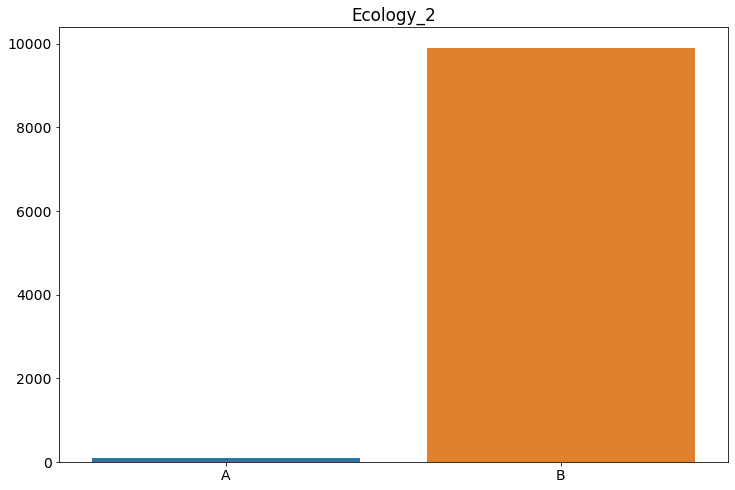

In [93]:
counts = df['Ecology_2'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Ecology_2')
sns.barplot(counts.index, counts.values)
    
plt.show()

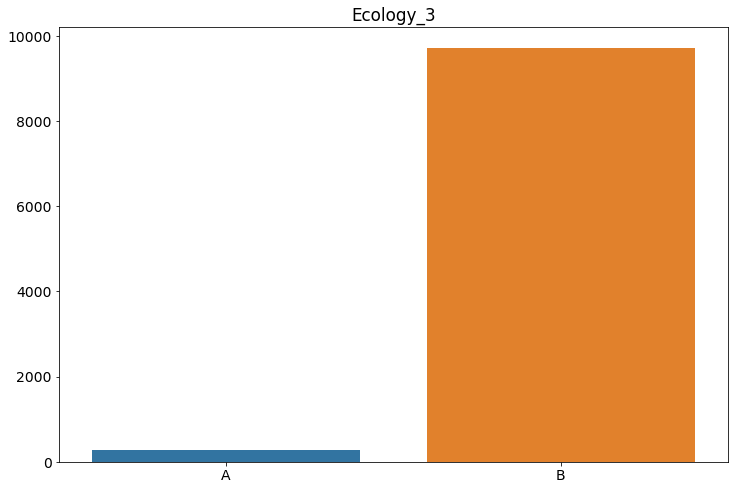

In [94]:
counts = df['Ecology_3'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Ecology_3')
sns.barplot(counts.index, counts.values)
    
plt.show()

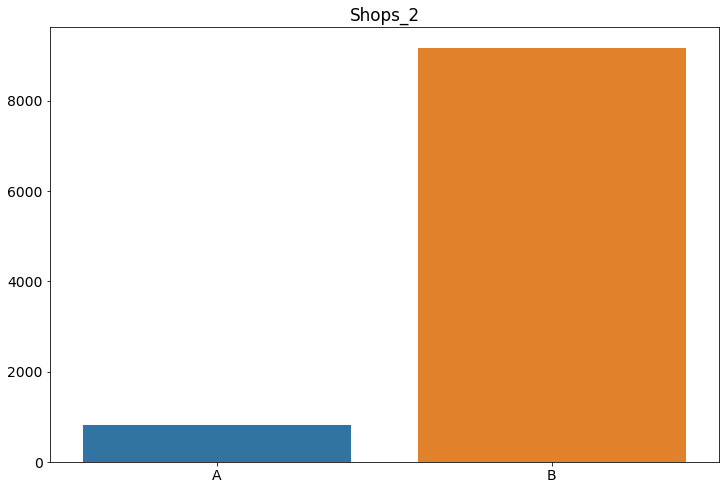

In [95]:
counts = df['Shops_2'].value_counts()
    
plt.figure(figsize=(12,8))    
plt.title('Shops_2')
sns.barplot(counts.index, counts.values)
    
plt.show()

Матрица корреляций

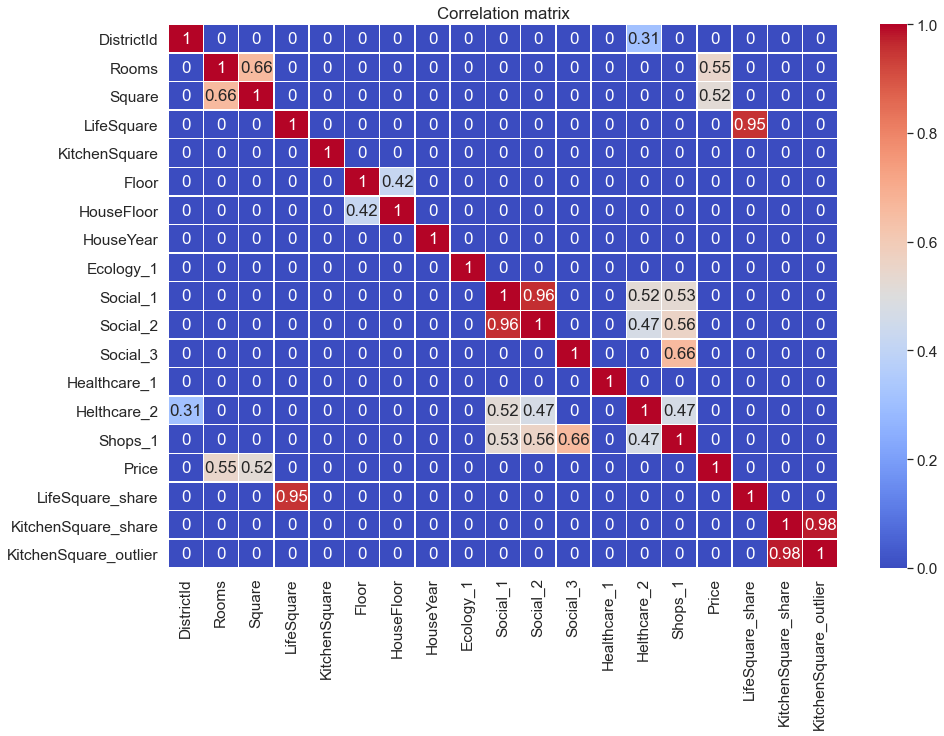

In [96]:
plt.figure(figsize = (15,10))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [ ]:
# сильная корреляция Цены за 1 кв м проходит по признакам Количество комнат и Общая площадь объекта недвижимости. 
# также вден квадрат корреляции в социальных признаках Healthcare_2 Shops_1: возможно либо выбросить либо сделать нелинейные преобразования

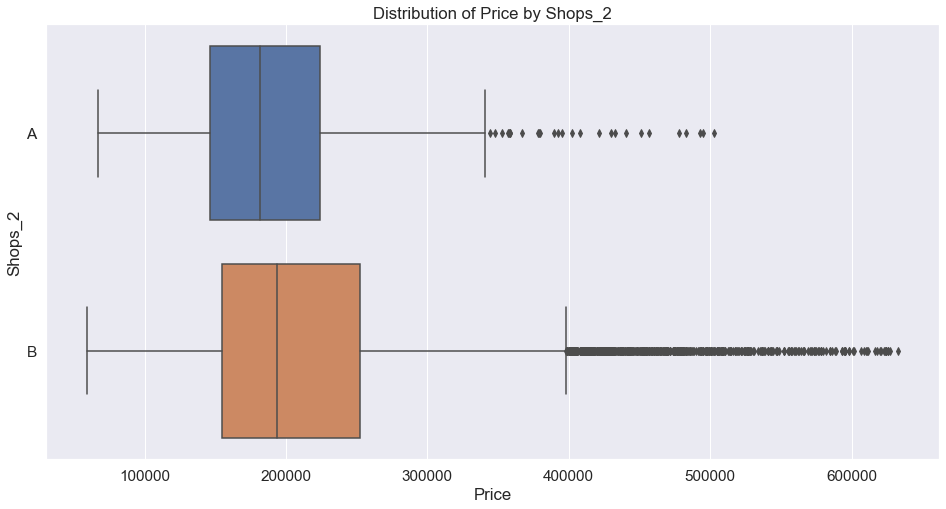

In [111]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Price'], df['Shops_2'])

plt.xlabel('Price')
plt.ylabel('Shops_2')
plt.title('Distribution of Price by Shops_2')
plt.show()

In [112]:
df['Shops_2_outlier'] = (df['Price'] > 400000) * 1 

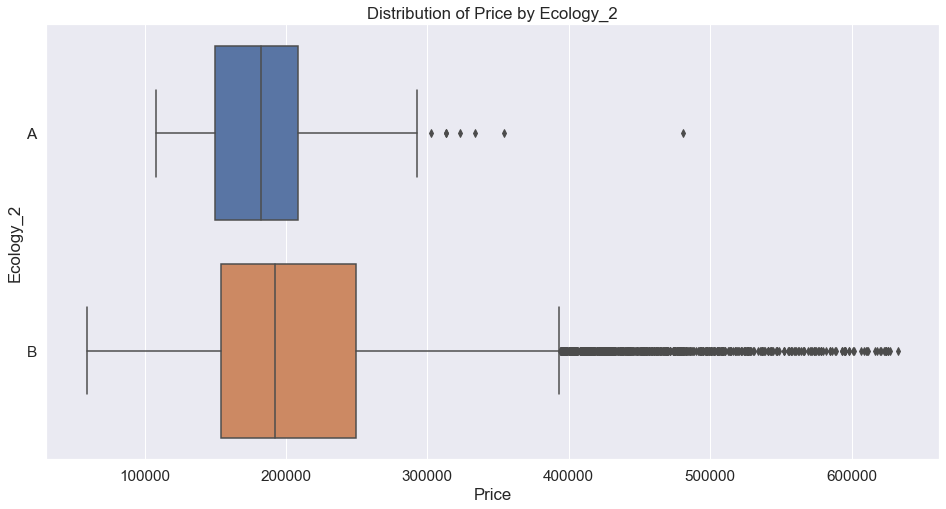

In [113]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Price'], df['Ecology_2'])

plt.xlabel('Price')
plt.ylabel('Ecology_2')
plt.title('Distribution of Price by Ecology_2')
plt.show()

In [114]:
df['Ecology_2_outlier'] = (df['Price'] > 400000) * 1 

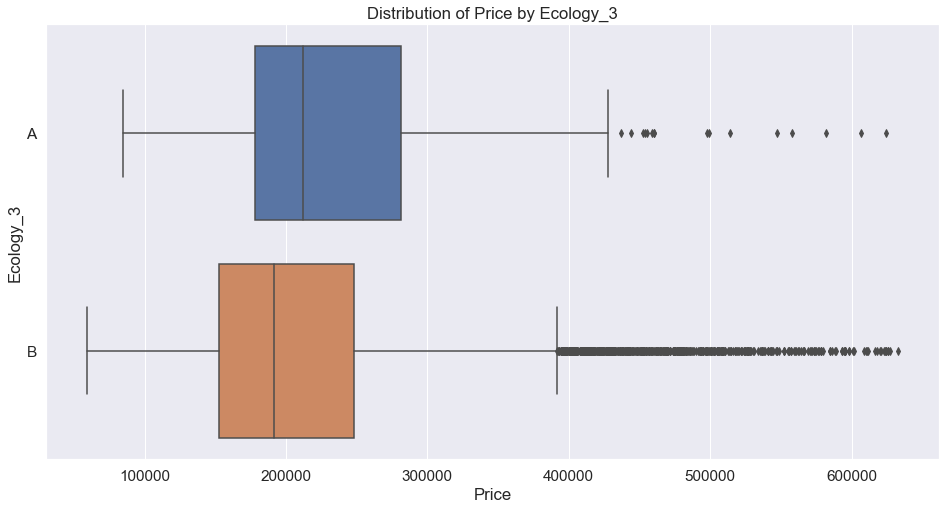

In [115]:
plt.figure(figsize=(16, 8))

sns.boxplot(df['Price'], df['Ecology_3'])

plt.xlabel('Price')
plt.ylabel('Ecology_3')
plt.title('Distribution of Price by Ecology_3')
plt.show()

In [116]:
df['Ecology_3_outlier'] = (df['Price'] > 430000) * 1 

In [ ]:
# вывели выбросы по признакам Ecology_3 Ecology_2 Shops_2

In [122]:
df_medianPrice = df.groupby(['DistrictId'])['Price'].mean().reset_index()
df_medianPrice.head()

,DistrictId,Price
0,0,195295.546875
1,1,187805.406250
2,2,243688.671875
3,3,179905.015625
4,4,300096.531250


2. Обучение модели

In [229]:
REPORTS_FILE_PATH = './reports/'
SCALER_FILE_PATH = './models/scaler.pkl'
MODEL_FILE_PATH = './models/model.pkl'

In [ ]:
class DataPipeline:
    """Подготовка исходных данных"""
    # надо ли его делать, если я всю свою работу здесь в любом случае оставляю, чтобы Вы смогли оценить "ход мысли" или ее отсутствие :)
    # но мне понятно, что для реального рабочего проекта, ход мысли не интересен, нужно именно, выдавать правильный датасет  

In [136]:
df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'LifeSquare_share',
 'KitchenSquare_share',
 'KitchenSquare_outlier',
 'HouseFloor_veryhigh',
 'big_Square',
 'Shops_2_outlier',
 'Ecology_2_outlier',
 'LifeSquare_share_outlier']

In [163]:
feature_names = [ 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1'
 ]

target_name = 'Price'

In [164]:
df = df[feature_names + [target_name]]
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,27,3.0,115.027313,32.781261,10.0,4,10.0,2014,0.075424,11,3097,0,900.0,0,0,305019.0
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177735.0
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282079.0
3,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,1,264,0,900.0,0,1,168106.0
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,33,8667,2,900.0,0,6,343995.0


Стандартизация признаков

In [182]:
feature_names_for_stand = df[feature_names].select_dtypes(include=['float32', 'int8', 'int16', 'int32']).columns.tolist()
feature_names_for_stand

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [183]:
scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])

In [184]:
stand_features

array([[-0.53689523,  1.32166737,  2.78812962, ..., -0.16924   ,
        -0.8834798 , -0.88040193],
       [-0.65161251, -1.06078845, -0.7827668 , ...,  0.20979876,
        -0.2139233 , -0.88040193],
       [-1.1334251 ,  1.32166737,  1.04600519, ..., -1.05321732,
         1.12518969, -0.67233303],
       ...,
       [ 2.92756667, -1.06078845, -1.26641304, ..., -0.16924   ,
        -0.2139233 ,  0.15994256],
       [-0.67455597, -1.06078845, -1.13903739, ..., -1.20724367,
         1.12518969,  0.15994256],
       [ 1.00031634, -1.06078845, -0.97353084, ..., -0.16924   ,
         1.12518969,  0.99221816]])

In [185]:
stand_features.shape

(10000, 15)

In [186]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
0,27,3.0,115.027313,32.781261,10.0,4,10.0,2014,0.075424,11,3097,0,900.0,0,0,305019.0
1,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,30,6207,1,1183.0,1,0,177735.0
2,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,33,5261,0,240.0,3,1,282079.0
3,1,1.0,40.409908,32.781261,1.0,10,22.0,1977,0.007122,1,264,0,900.0,0,1,168106.0
4,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,33,8667,2,900.0,0,6,343995.0


Сохранение датасета

In [187]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8', sep=';')

Разбиение на train / test

In [188]:
X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=42)

Построение моделей

In [189]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 700000], [0, 700000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

Linear Regression

R2:	0.49
RMSE:	65183.119
MSE:	4248839020.607


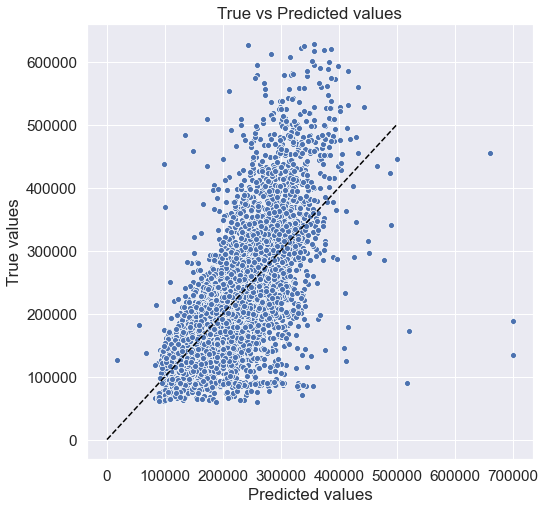

In [205]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_preds = lr_model.predict(X_train)
# Постпроцессинг
y_train_preds = np.clip(y_train_preds, a_min=10000, a_max=700000)

evaluate_preds(y_train, y_train_preds)

In [ ]:
# R2 низкий 0,49
# отклонение влево, недопредсказываем квартиры с высокой стоимостью 
# есть погрешности модель предсказала 510 тыс, по факту 90 тыс

R2:	0.49
RMSE:	68560.623
MSE:	4700558973.903


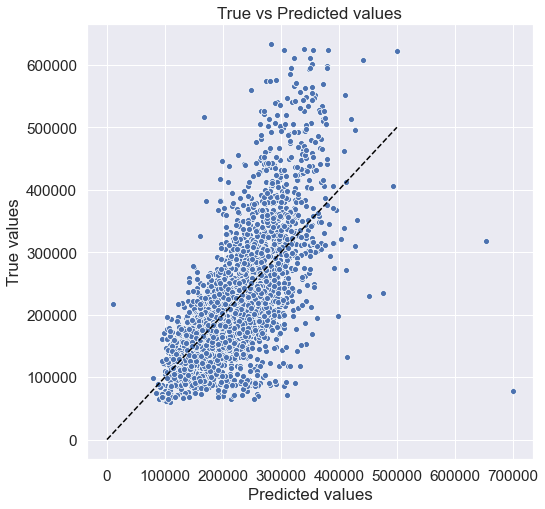

In [213]:
y_test_preds = lr_model.predict(X_test)

# Постпроцессинг
y_test_preds = np.clip(y_test_preds, a_min=10000, a_max=700000)

evaluate_preds(y_test, y_test_preds)

In [ ]:
# переобучения нет, недообучение 

Decision tree

R2:	0.735
RMSE:	47002.644
MSE:	2209248503.267


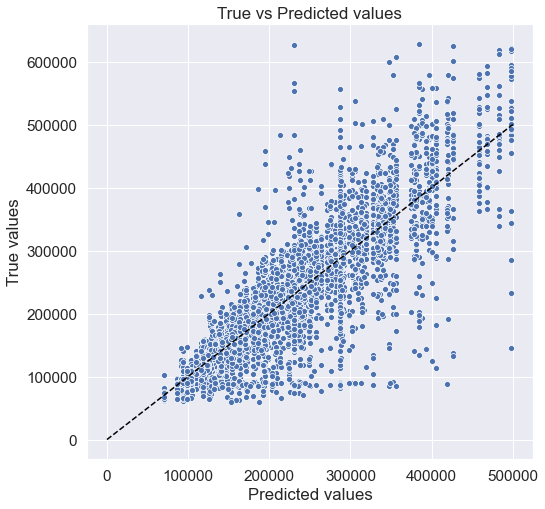

In [216]:
dt_model = DecisionTreeRegressor(criterion='mse', 
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=20, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42)
dt_model.fit(X_train, y_train)

y_train_preds = dt_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [ ]:
# показатель R2 0,735 лучше, чем при lr
# также есть отклонения от реальных данных по предсказаниям 

R2:	0.655
RMSE:	56365.015
MSE:	3177014960.688


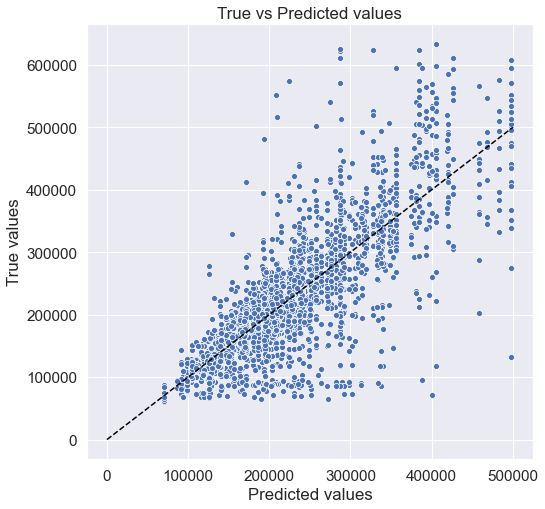

In [220]:
y_test_preds = dt_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

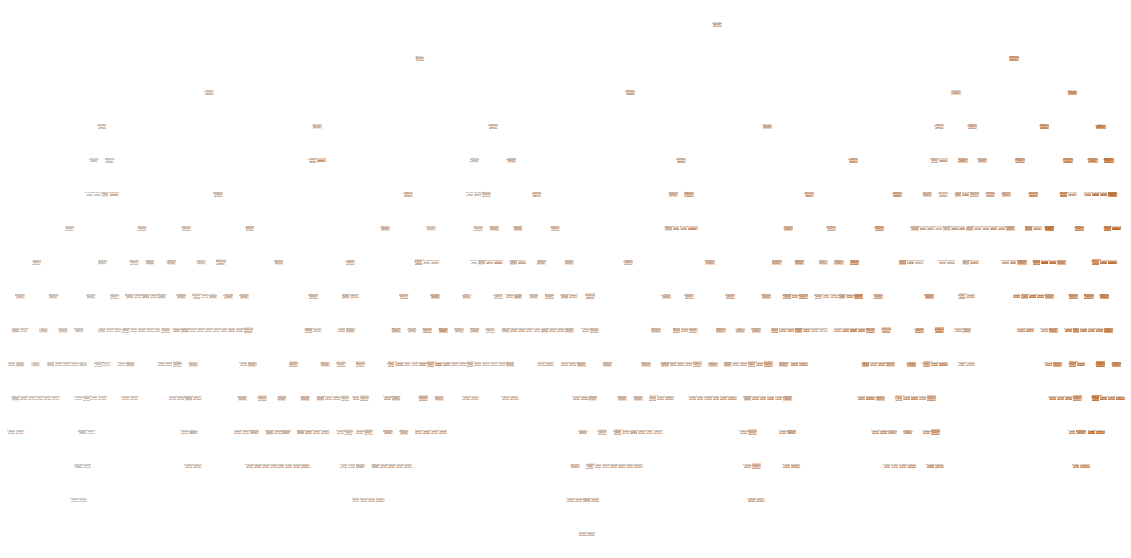

In [218]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X_train.columns, filled = True);

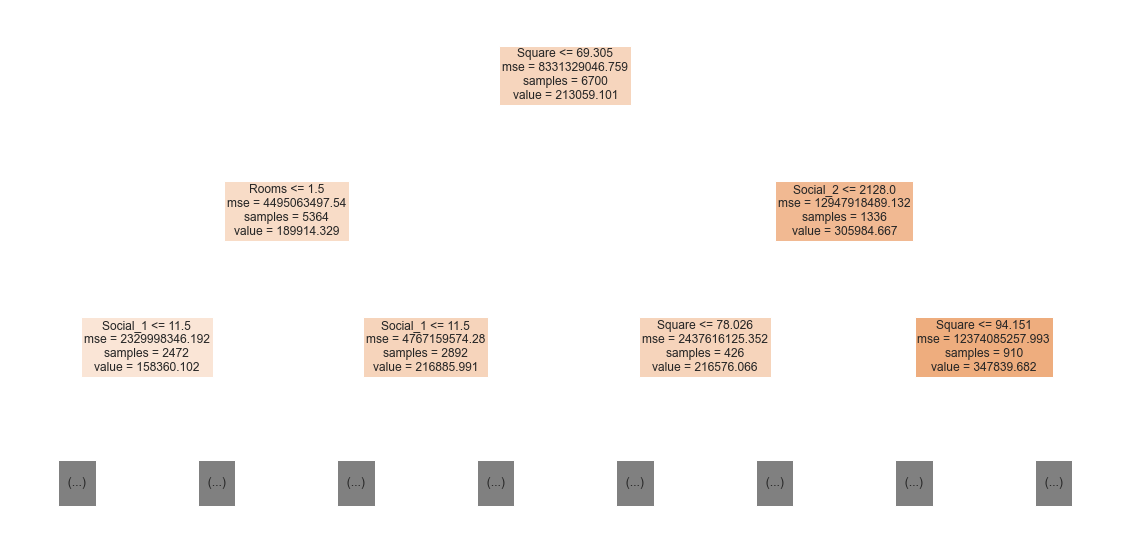

In [219]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X_train.columns, filled = True, max_depth=2);

In [179]:
# признаки Rooms, Square, Social являются значимыми 

Random Forest

R2:	0.752
RMSE:	45472.795
MSE:	2067775126.477


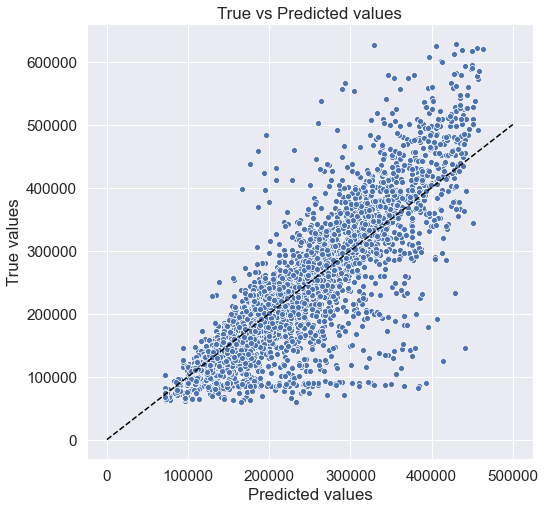

In [221]:
rf_model = RandomForestRegressor(criterion='mse',
                                 max_depth=20, # глубина дерева  
                                 min_samples_leaf=20, # минимальное кол-во наблюдений в листе дерева
                                 random_state=42,
                                 n_estimators=100  # кол-во деревьев
                                 )

rf_model.fit(X_train, y_train)
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.703
RMSE:	52295.406
MSE:	2734809442.534


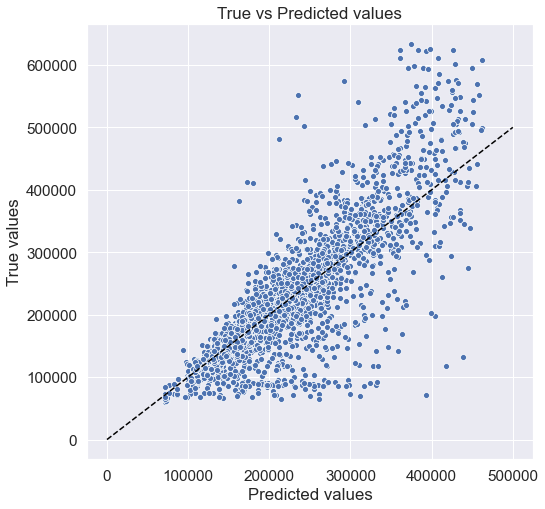

In [222]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

Gradient Boosting decision trees

R2:	0.898
RMSE:	29155.713
MSE:	850055616.235


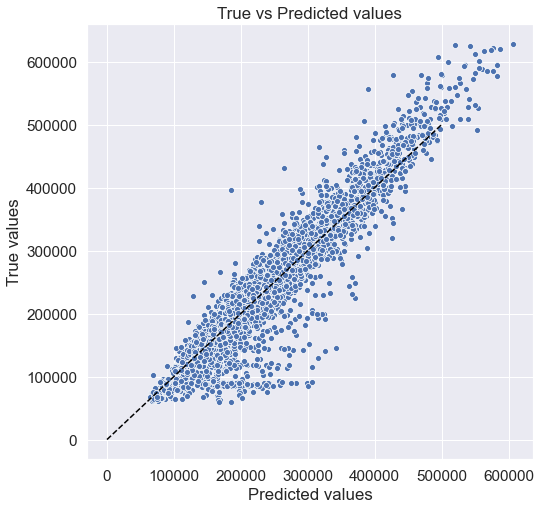

In [223]:
gb_model = GradientBoostingRegressor(criterion='mse',
                                     max_depth=7,
                                     min_samples_leaf=10,
                                     random_state=42,  
                                     n_estimators=100)
gb_model.fit(X_train, y_train)

y_train_preds = gb_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [ ]:
# Gradient Boosting decision trees показал самый высокий результат обучения 

R2:	0.738
RMSE:	49134.252
MSE:	2414174685.535


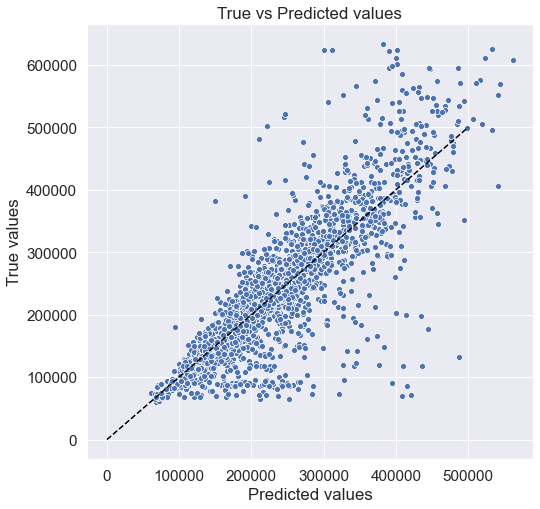

In [224]:
y_test_preds = gb_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

Настройка и оценка финальной модели

In [225]:
X_train.shape[0] // 5

1340

In [241]:
gb_model = GradientBoostingRegressor(criterion='mse',
                          min_samples_leaf=10,
                          random_state=42,
                         # n_estimators=100,
                         # max_depth=7
                         )

In [243]:
%%time
params = {'n_estimators':[50, 100, 200, 400], 
          'max_depth':[3, 5, 7, 10]}

gs = GridSearchCV(gb_model, params, 
                  scoring='r2', # метрика 
                  cv=KFold(n_splits=5,   # k (кол-во разбиений/итераций) в кросс-валидации
                           random_state=21, 
                           shuffle=True),
                  n_jobs=-1
                  )
gs.fit(X_train, y_train)

Wall time: 56.7 s


GridSearchCV(cv=KFold(n_splits=5, random_state=21, shuffle=True),
             estimator=GradientBoostingRegressor(criterion='mse',
                                                 min_samples_leaf=10,
                                                 random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200, 400]},
             scoring='r2')

In [244]:
res = pd.DataFrame(gs.cv_results_)
res.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.686951,0.040388,0.004588,0.000490,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.648792,0.659134,0.706136,0.684014,0.697039,0.679023,0.021882,16
1,1.257244,0.058327,0.006982,0.001668,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.672980,0.688044,0.739514,0.708926,0.733700,0.708633,0.025601,15


In [245]:
gs.best_params_

{'max_depth': 5, 'n_estimators': 200}

In [246]:
gs.best_score_

0.7383062910444124

Обучение и оценка модели

R2:	0.877
RMSE:	31980.117
MSE:	1022727900.422


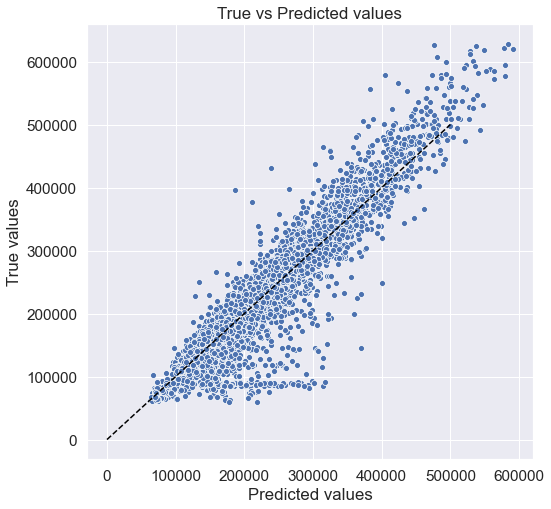

In [249]:
final_model = GradientBoostingRegressor(criterion='mse',
                                        max_depth=5,
                                        min_samples_leaf=15,
                                        random_state=42,  
                                        n_estimators=200)

final_model.fit(X_train, y_train)

y_train_preds = final_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.746
RMSE:	48358.992
MSE:	2338592091.259


FileNotFoundError: [Errno 2] No such file or directory: './reports/report.png'

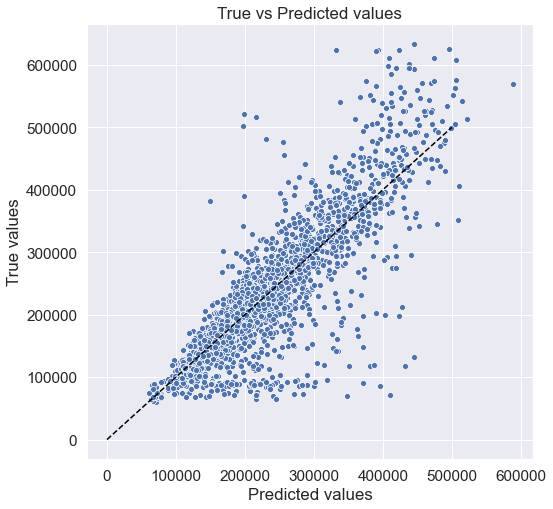

In [250]:
y_test_preds = final_model.predict(X_test)
evaluate_preds(y_test, y_test_preds, save=True)

In [ ]:
# недопредсказываем стоимость недорогих домов, на тесте 0,746 (не дотягивает до 0,75)

Анализ прогнозов

In [251]:
final_model.feature_importances_

array([0.05127528, 0.06368735, 0.40732921, 0.01911309, 0.0240015 ,
       0.01856406, 0.02234508, 0.03148873, 0.04863953, 0.09626969,
       0.10392563, 0.06890919, 0.02365874, 0.00525304, 0.01553988])

In [232]:
feature_importances = pd.DataFrame(zip(X_train.columns, 
                                       final_model.feature_importances_), 
                                   columns=['feature_name', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [233]:
# Топ 3 фичи

In [252]:
feature_importances.head(3)

,feature_name,importance
2,Square,0.388315
10,Social_2,0.112703
9,Social_1,0.086418


In [235]:
# Худшие 3 фичи

In [238]:
REPORTS_FILE_PATH = './reports/'

In [253]:
feature_importances.tail(3)

,feature_name,importance
12,Healthcare_1,0.023156
14,Shops_1,0.015096
13,Helthcare_2,0.005653


In [239]:
feature_importances.to_csv(REPORTS_FILE_PATH + 'feature_importances.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: './reports/feature_importances.csv'

In [ ]:
#  не понимаю, почему не передает в файл, я его внесла

Сохранение модели

In [254]:
with open(SCALER_FILE_PATH, 'wb') as file:
    pickle.dump(scaler, file)

FileNotFoundError: [Errno 2] No such file or directory: './models/scaler.pkl'

In [255]:
with open(MODEL_FILE_PATH, 'wb') as file:
    pickle.dump(final_model, file)

FileNotFoundError: [Errno 2] No such file or directory: './models/model.pkl'

In [256]:
with open(MODEL_FILE_PATH, 'rb') as file:
    my_model = pickle.load(file)
    
my_model

FileNotFoundError: [Errno 2] No such file or directory: './models/model.pkl'

In [257]:
import sklearn
print(sklearn.__version__)

0.23.1


In [258]:
pip freeze

alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid @ file:///C:/ci/astroid_1592487315634/work
astropy==4.0.1.post1
atomicwrites==1.4.0
attrs==19.3.0
autopep8 @ file:///tmp/build/80754af9/autopep8_1592412889138/work
Babel==2.8.0
Note: you may need to restart the kernel to use updated packages.
backcall==0.2.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.9.1
binary-tree==0.0.1
binarytree==5.1.0
bitarray @ file:///C:/ci/bitarray_1594751093906/work
bkcharts==0.2
bleach==3.1.5
bokeh @ file:///C:/ci/bokeh_1593178781838/work
boto==2.49.0
Bottleneck==1.3.2
brotlipy==0.7.0
certifi==2020.6.20
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle @ file:///tmp/build/80754af9/cloudpickle_1594141588948/work
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
conda==4.8.3
conda-build==3.18.11
conda-package-hand